In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")
import seaborn as sn
import numpy as np

In [2]:
df=pd.read_csv('temperature.csv')
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [3]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [4]:
df.shape

(7752, 25)

In [5]:
df.isnull().values.any()

True

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [7]:
df[df.Date.isnull()]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.370,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.335,5.178230,5992.895996,38.9,29.8


In [8]:
df.Date.value_counts()

08-07-2015    25
23-08-2014    25
13-08-2016    25
28-08-2013    25
11-08-2013    25
              ..
02-08-2017    25
28-07-2015    25
10-07-2014    25
18-07-2016    25
21-08-2015    25
Name: Date, Length: 310, dtype: int64

In [9]:
df=df[df.Date.notnull()]

In [10]:
for i in range(len(df['Date'])):
    df['Date'][i]=int(df['Date'][i].split('-')[1])
df = df.astype({'Date': np.int64})

In [12]:
df_new=df[df.Next_Tmax.notnull()][df.Next_Tmin.notnull()]

In [13]:
df_new[df_new.Next_Tmax.isnull()]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin


In [14]:
print('Number of rows x columns in dataset are:',df_new.shape)

Number of rows x columns in dataset are: (7723, 25)


In [15]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7723 non-null   float64
 1   Date              7723 non-null   int64  
 2   Present_Tmax      7663 non-null   float64
 3   Present_Tmin      7663 non-null   float64
 4   LDAPS_RHmin       7648 non-null   float64
 5   LDAPS_RHmax       7648 non-null   float64
 6   LDAPS_Tmax_lapse  7648 non-null   float64
 7   LDAPS_Tmin_lapse  7648 non-null   float64
 8   LDAPS_WS          7648 non-null   float64
 9   LDAPS_LH          7648 non-null   float64
 10  LDAPS_CC1         7648 non-null   float64
 11  LDAPS_CC2         7648 non-null   float64
 12  LDAPS_CC3         7648 non-null   float64
 13  LDAPS_CC4         7648 non-null   float64
 14  LDAPS_PPT1        7648 non-null   float64
 15  LDAPS_PPT2        7648 non-null   float64
 16  LDAPS_PPT3        7648 non-null   float64


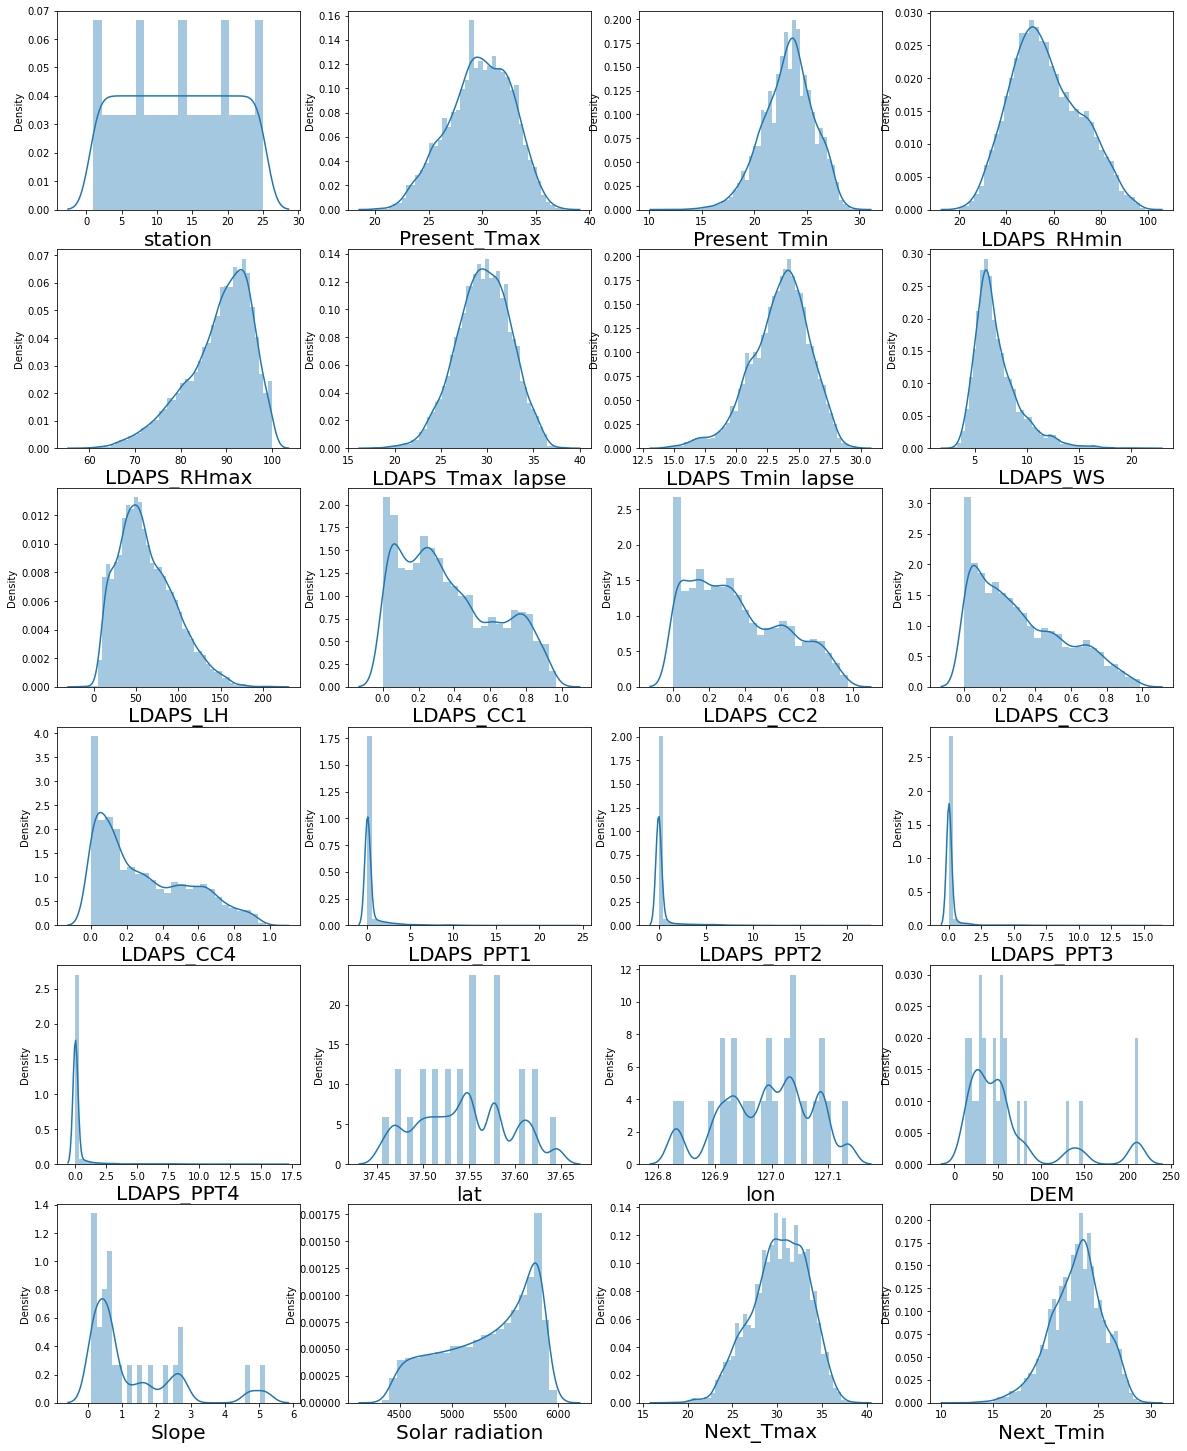

In [17]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1
for column in df.columns:
    if column!='Date':
        if plotnumber<=len(df.columns):
            ax=plt.subplot(7,4,plotnumber)
            sn.distplot(df[column])
            plt.xlabel(column,fontsize=20)
        plotnumber+=1
plt.show()

In [18]:
for i in df_new.columns:
    if len(df_new[df_new[i].isnull()])>0:
        print(i)
        print(len(df_new[df_new[i].isnull()]))
        print(round(df_new[i].mean(),2))
        df_new[[i]]=df_new[[i]].fillna(round(df_new[i].mean(),2))
        print(len(df_new[df_new[i].isnull()]))
        print('-----------------'*5)

Present_Tmax
60
29.77
0
-------------------------------------------------------------------------------------
Present_Tmin
60
23.23
0
-------------------------------------------------------------------------------------
LDAPS_RHmin
75
56.74
0
-------------------------------------------------------------------------------------
LDAPS_RHmax
75
88.37
0
-------------------------------------------------------------------------------------
LDAPS_Tmax_lapse
75
29.62
0
-------------------------------------------------------------------------------------
LDAPS_Tmin_lapse
75
23.51
0
-------------------------------------------------------------------------------------
LDAPS_WS
75
7.1
0
-------------------------------------------------------------------------------------
LDAPS_LH
75
62.46
0
-------------------------------------------------------------------------------------
LDAPS_CC1
75
0.37
0
-------------------------------------------------------------------------------------
LDAPS_CC2
75
0.36


In [19]:
df_new

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,6,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,6,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,6,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,6,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,6,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,8,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,8,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,8,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,8,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [20]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7723 non-null   float64
 1   Date              7723 non-null   int64  
 2   Present_Tmax      7723 non-null   float64
 3   Present_Tmin      7723 non-null   float64
 4   LDAPS_RHmin       7723 non-null   float64
 5   LDAPS_RHmax       7723 non-null   float64
 6   LDAPS_Tmax_lapse  7723 non-null   float64
 7   LDAPS_Tmin_lapse  7723 non-null   float64
 8   LDAPS_WS          7723 non-null   float64
 9   LDAPS_LH          7723 non-null   float64
 10  LDAPS_CC1         7723 non-null   float64
 11  LDAPS_CC2         7723 non-null   float64
 12  LDAPS_CC3         7723 non-null   float64
 13  LDAPS_CC4         7723 non-null   float64
 14  LDAPS_PPT1        7723 non-null   float64
 15  LDAPS_PPT2        7723 non-null   float64
 16  LDAPS_PPT3        7723 non-null   float64


In [21]:
df_new.describe()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,...,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000
mean,13.008157,7.466917,29.769817,23.225353,56.740762,88.371453,29.616687,23.512195,7.095405,62.458821,...,0.481582,0.275170,0.267359,37.544753,126.991373,61.913798,1.258368,5342.112868,30.275437,22.932837
std,7.214034,0.530389,2.956157,2.400841,14.571702,7.155898,2.927713,2.330885,2.165080,33.505514,...,1.736231,1.138910,1.185557,0.050370,0.079318,54.308844,1.370719,429.072274,3.123441,2.483181
min,1.000000,6.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,7.000000,27.800000,21.700000,46.045780,84.291611,27.696327,22.114527,5.686500,37.460390,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,7.000000,29.900000,23.400000,55.266701,89.699196,29.664030,23.733589,6.564141,57.299645,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5437.534180,30.500000,23.100000
75%,19.000000,8.000000,32.000000,24.900000,66.991833,93.702629,31.684914,25.134434,7.996720,83.884903,...,0.024025,0.009648,0.000696,37.577600,127.042000,59.832400,1.767800,5728.624512,32.600000,24.600000
max,25.000000,8.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178200,5992.895996,38.900000,29.800000


In [22]:
df_new.corr()[['Next_Tmax','Next_Tmin']]

,Next_Tmax,Next_Tmin
station,0.108306,0.128719
Date,0.102792,0.033754
Present_Tmax,0.609838,0.622235
Present_Tmin,0.470229,0.796415
LDAPS_RHmin,-0.442575,0.092968
LDAPS_RHmax,-0.287557,-0.075366
LDAPS_Tmax_lapse,0.828281,0.586581
LDAPS_Tmin_lapse,0.586735,0.881333
LDAPS_WS,-0.348681,-0.100922
LDAPS_LH,0.155615,-0.058755


<AxesSubplot:>

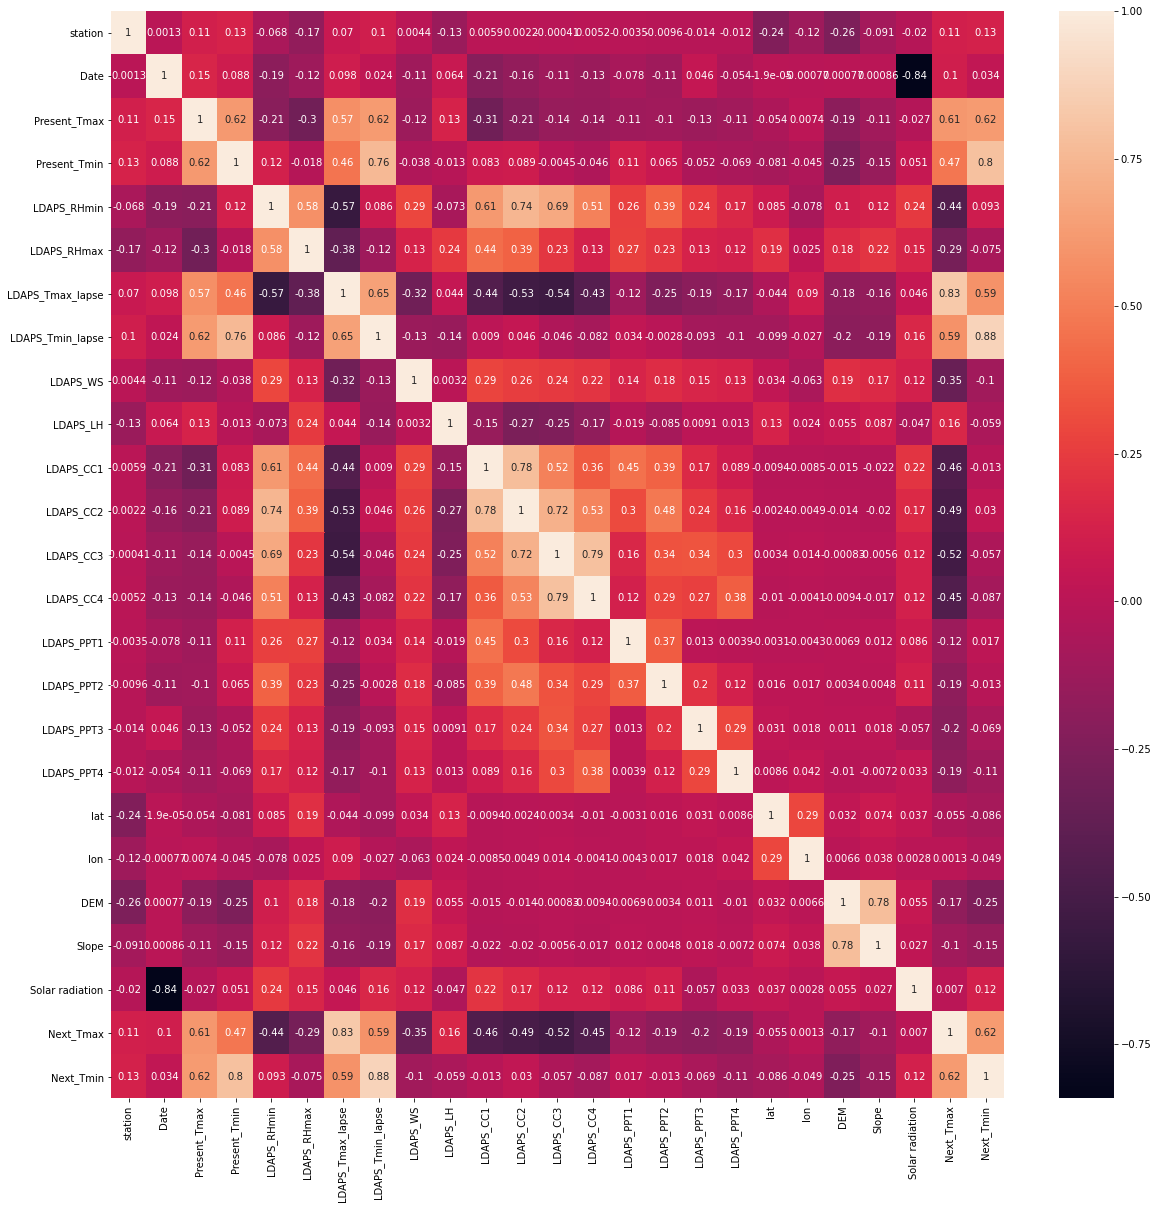

In [25]:
plt.figure(figsize=[20,20])
sn.heatmap(df_new.corr(),annot=True)

In [26]:
df_new=df_new.drop(['Date','LDAPS_LH','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','lat','lon',
                    'DEM','Slope','Solar radiation'],axis=1)

In [27]:
df_new

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,0.233947,0.203896,1.616969e-01,0.130928,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,0.225508,0.251771,1.594441e-01,0.127727,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,0.209344,0.257469,2.040915e-01,0.142125,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,0.216372,0.226002,1.611574e-01,0.134249,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,0.151407,0.249995,1.788925e-01,0.170021,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,0.052902,0.030169,0.000000e+00,0.004380,27.6,17.7
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,0.066461,0.024518,5.850000e-07,0.017678,28.0,17.1
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,0.030034,0.081035,0.000000e+00,0.000000,28.3,18.1
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,0.035874,0.074962,0.000000e+00,0.000000,28.6,18.8


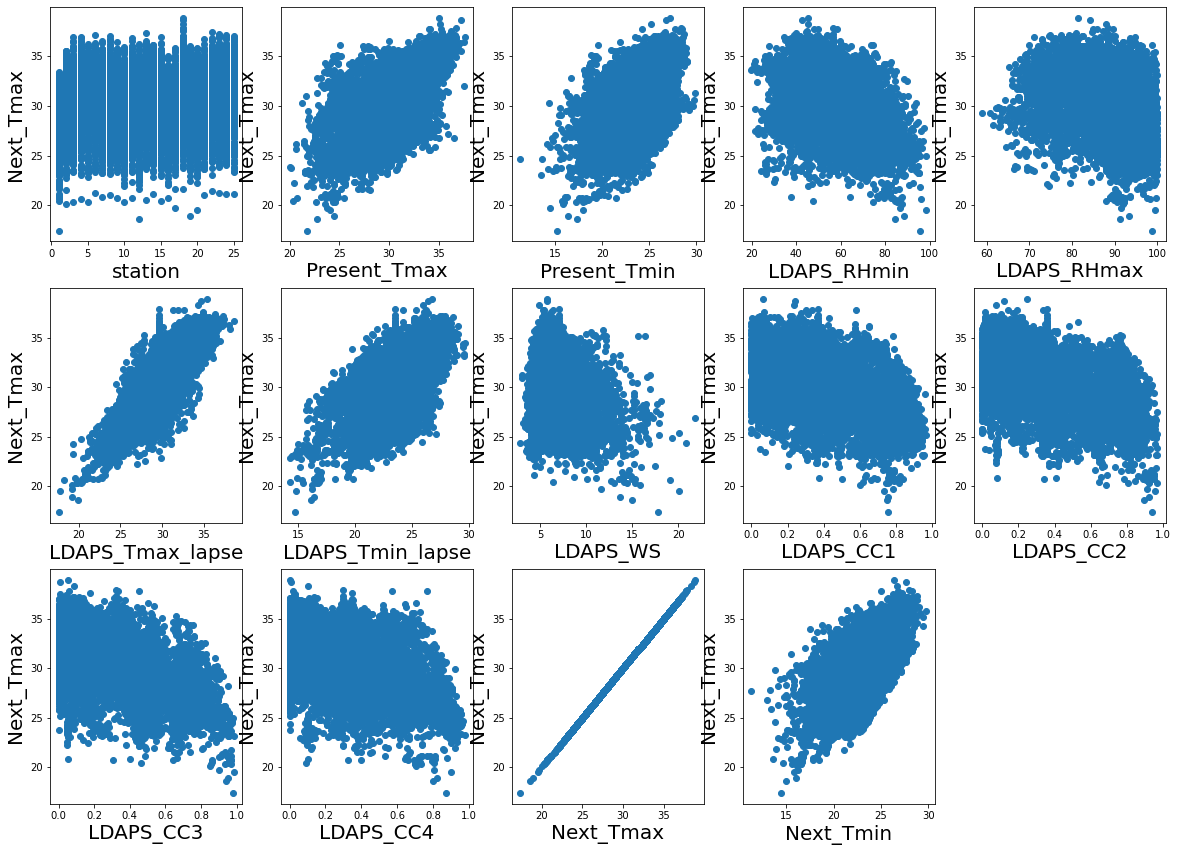

In [28]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for i in df_new.columns:
    if plotnumber<=len(df_new.columns):
        ax=plt.subplot(5,5,plotnumber)
        plt.scatter(df_new[i],df_new['Next_Tmax'])
        plt.xlabel(i,fontsize=20)
        plt.ylabel('Next_Tmax',fontsize=20)
    plotnumber+=1
plt.show()

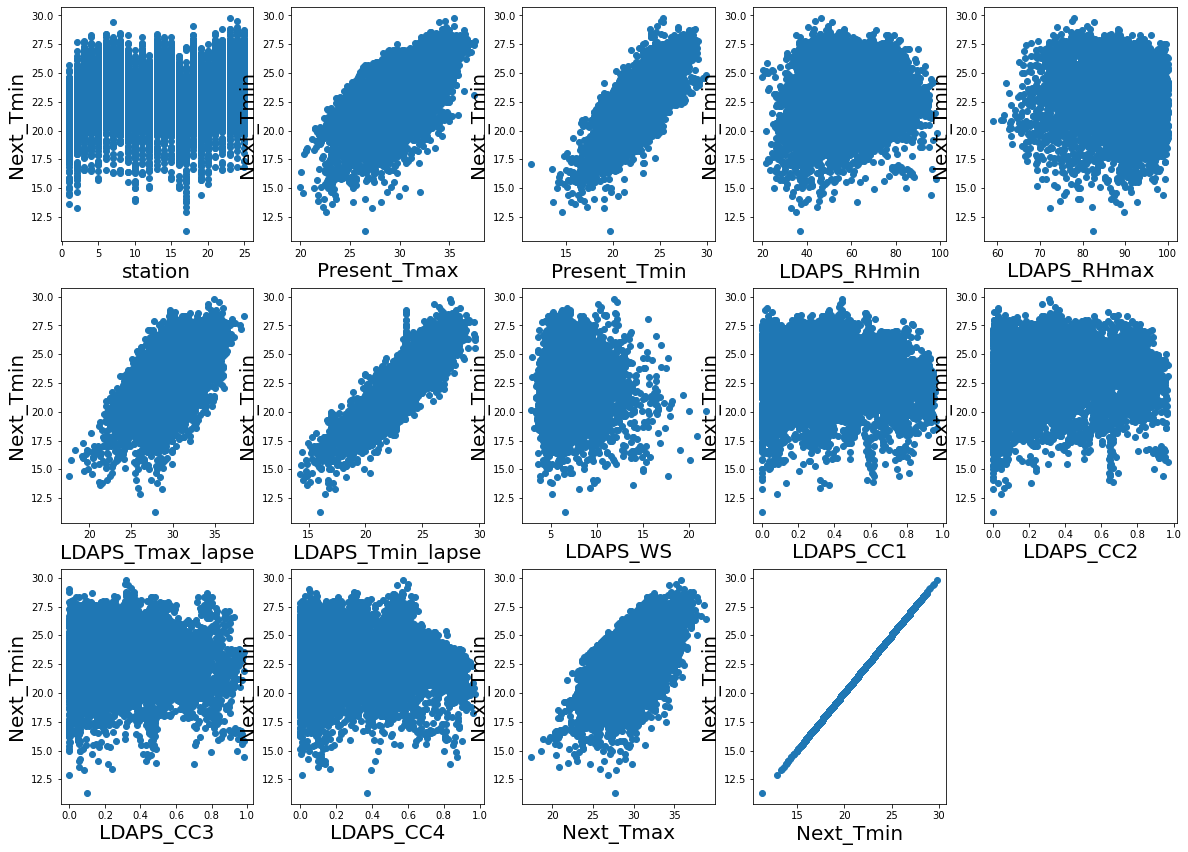

In [29]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for i in df_new.columns:
    if plotnumber<=len(df_new.columns):
        ax=plt.subplot(5,5,plotnumber)
        plt.scatter(df_new[i],df_new['Next_Tmin'])
        plt.xlabel(i,fontsize=20)
        plt.ylabel('Next_Tmin',fontsize=20)
    plotnumber+=1
plt.show()

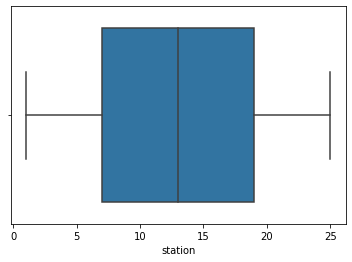

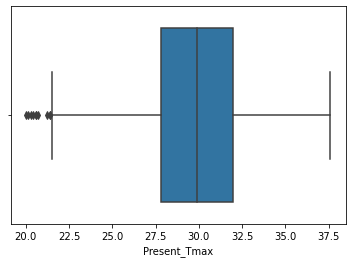

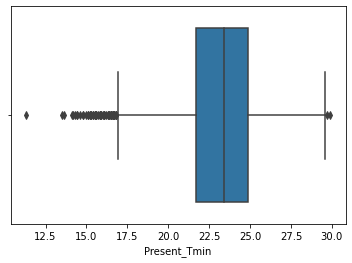

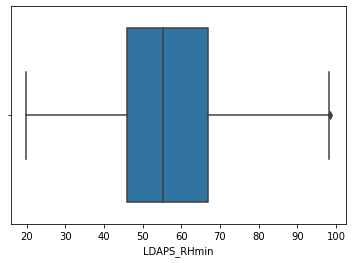

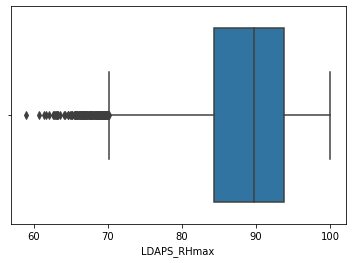

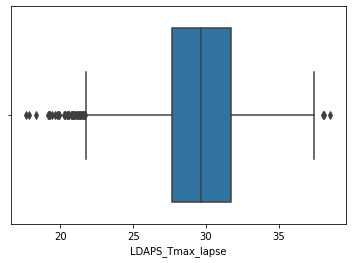

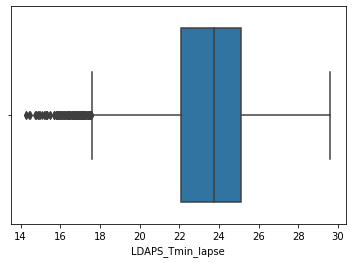

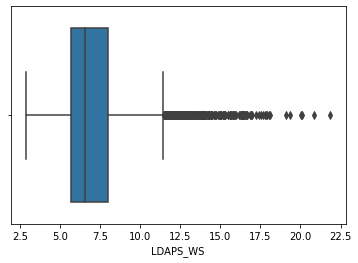

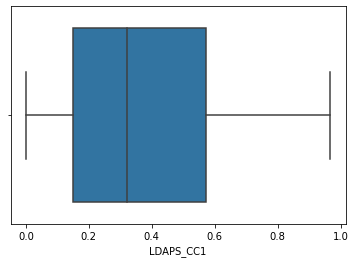

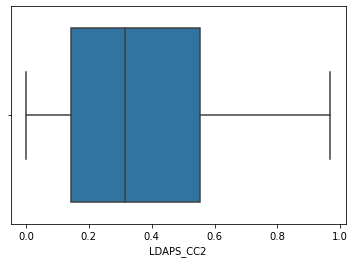

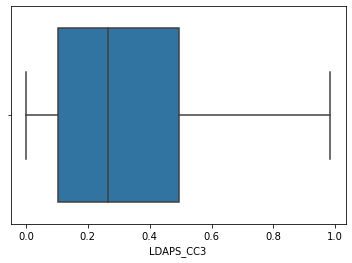

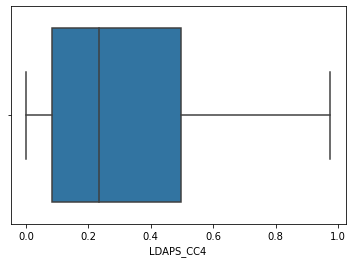

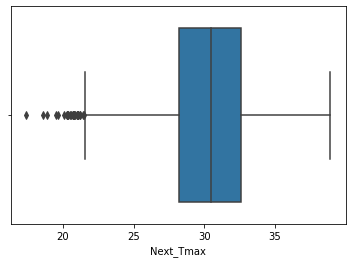

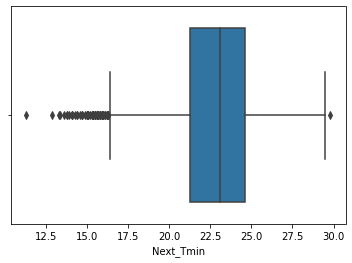

In [30]:
for i in df_new.columns:
    sn.boxplot(df_new[i])
    plt.show()

In [31]:
from scipy.stats import zscore
z_scr=zscore(df_new)
print(df_new.shape)
df_neww=df_new.loc[(abs(z_scr)<3).all(axis=1)]
print(df_neww.shape)

(7723, 14)
(7467, 14)


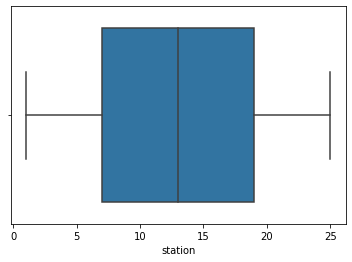

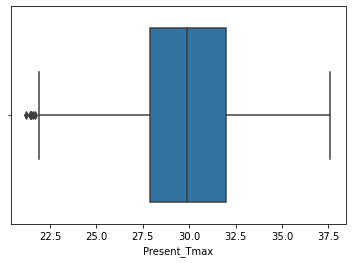

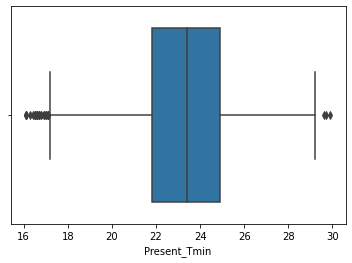

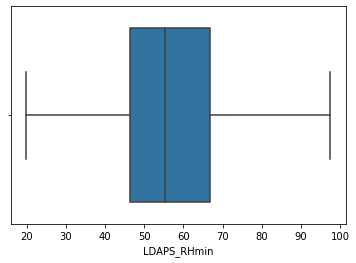

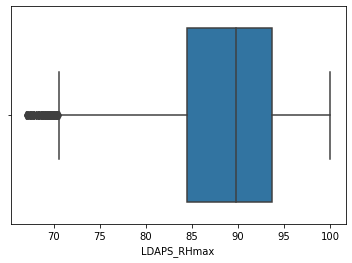

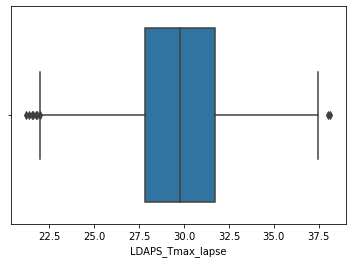

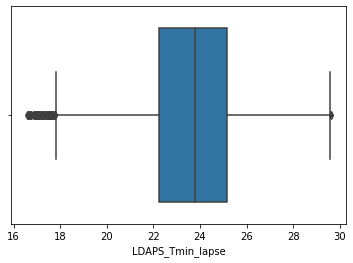

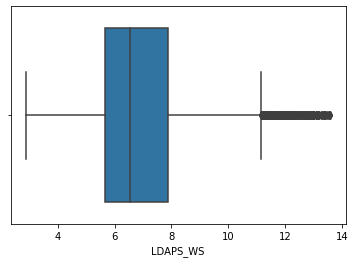

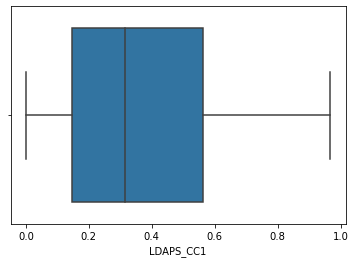

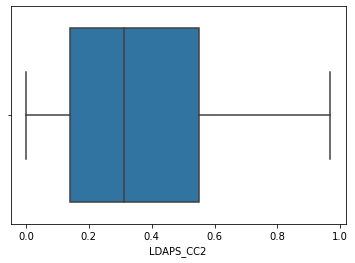

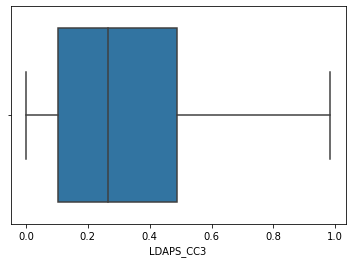

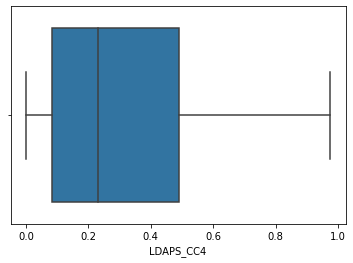

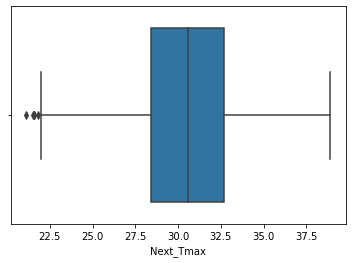

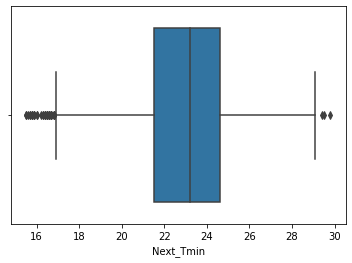

In [32]:
for i in df_neww.columns:
    sn.boxplot(df_neww[i])
    plt.show()

In [34]:
import scipy.stats as stats
Q1 = df_neww.quantile(q=.25)
Q3 = df_neww.quantile(q=.75)
IQR = df_neww.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = df_neww[~((df_neww < (Q1-1.5*IQR)) | (df_neww > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape

(6970, 14)

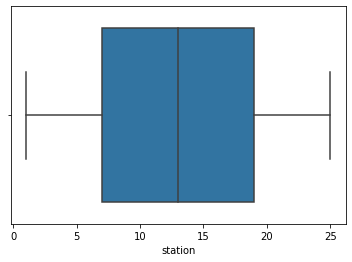

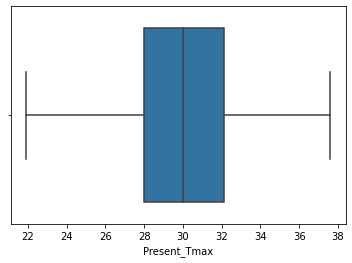

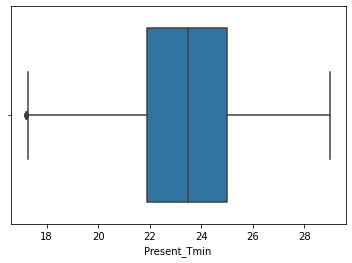

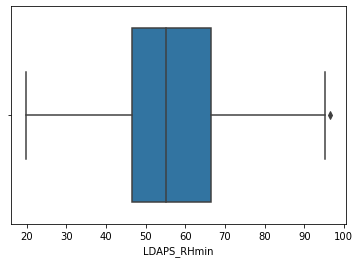

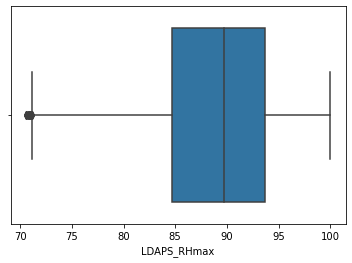

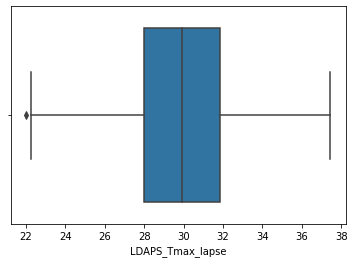

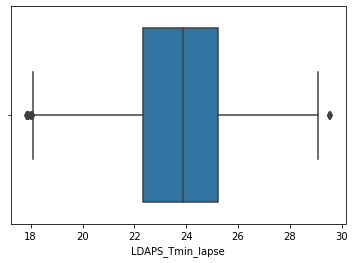

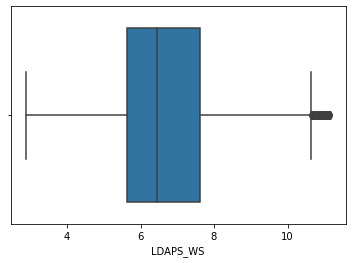

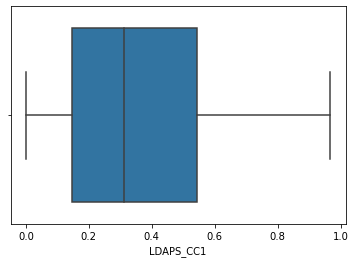

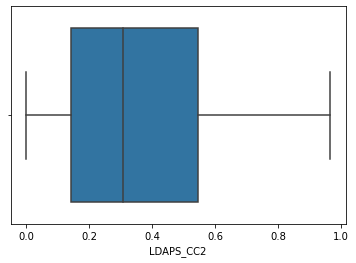

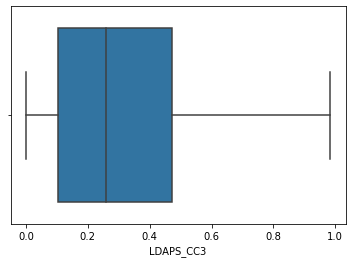

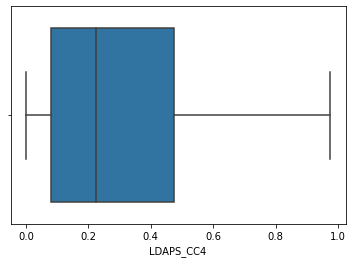

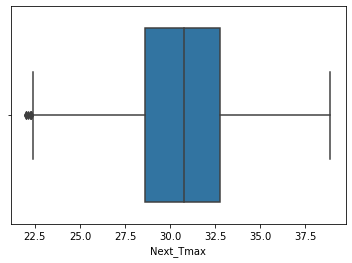

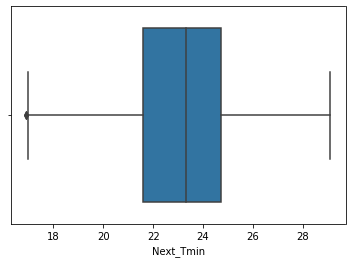

In [35]:
for i in data_clean.columns:
    sn.boxplot(data_clean[i])
    plt.show()

In [37]:
import random
data_clean.reset_index(inplace=True)
n=6970
s=2091
skip = sorted(random.sample(range(1, n), n-s))  # n+1 to compensate for header
sampledf=data_clean.copy()
sampledf.drop(skip,axis=0,inplace=True)
sampledf

,level_0,index,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,Next_Tmax,Next_Tmin
0,0,0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,0.233947,0.203896,0.161697,0.130928,29.1,21.2
4,4,4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,0.151407,0.249995,0.178892,0.170021,31.2,22.5
5,5,5,6.0,31.9,23.5,52.437126,85.307251,29.219342,23.822613,6.182295,0.185279,0.280818,0.232841,0.146363,31.5,24.0
8,8,8,9.0,31.4,22.0,55.338791,80.784607,28.426975,23.332373,6.017135,0.408766,0.344800,0.264980,0.148911,31.3,21.6
9,9,9,10.0,31.6,20.5,56.651203,86.849632,27.576705,22.527018,6.518841,0.348292,0.306255,0.245254,0.135443,30.5,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6949,6949,7663,14.0,25.8,20.8,49.787209,90.899765,26.801016,20.702398,7.787976,0.483112,0.514917,0.833875,0.598517,27.1,18.0
6951,6951,7665,16.0,25.3,18.1,56.788166,90.916115,25.776138,20.897100,8.180217,0.454651,0.507841,0.766018,0.515353,26.4,17.7
6954,6954,7669,20.0,25.5,18.6,69.926682,99.260132,24.544052,19.268704,7.207380,0.473609,0.484506,0.831320,0.811528,25.9,17.3
6957,6957,7672,23.0,26.0,20.9,56.605389,91.945480,26.220300,20.138668,7.682873,0.476038,0.505922,0.835418,0.616844,28.2,18.1


In [38]:
y = sampledf[['Next_Tmin','Next_Tmax']]
x = sampledf.drop(columns = ['Next_Tmin','Next_Tmax'],axis=1)

In [39]:
print(x.skew())

level_0             0.028113
index               0.027760
station             0.023262
Present_Tmax       -0.265644
Present_Tmin       -0.096470
LDAPS_RHmin         0.343695
LDAPS_RHmax        -0.599216
LDAPS_Tmax_lapse   -0.094438
LDAPS_Tmin_lapse   -0.186332
LDAPS_WS            0.637319
LDAPS_CC1           0.565738
LDAPS_CC2           0.567570
LDAPS_CC3           0.716503
LDAPS_CC4           0.783981
dtype: float64


In [40]:
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.cbrt(x[index])

In [41]:
print(x.skew())
print()
print(len(x.skew().loc[x.skew()>0.55]))# Number of features having skewness more than 0.55 

level_0             0.028113
index               0.027760
station             0.023262
Present_Tmax       -0.265644
Present_Tmin       -0.096470
LDAPS_RHmin         0.343695
LDAPS_RHmax        -0.599216
LDAPS_Tmax_lapse   -0.094438
LDAPS_Tmin_lapse   -0.186332
LDAPS_WS            0.283460
LDAPS_CC1          -0.616891
LDAPS_CC2          -0.691975
LDAPS_CC3          -0.573823
LDAPS_CC4          -0.386957
dtype: float64

0


In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x[['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4']] = scaler.fit_transform(x[['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4']])
x

,level_0,index,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4
0,0,0,1.0,-0.447933,-0.915469,0.156967,0.404195,-0.683208,-0.366864,0.125031,-0.167066,-0.234008,-0.274310,-0.312254
4,4,4,5.0,0.490175,-0.692968,0.007863,0.255941,-0.305791,-0.138080,-0.616245,-0.566231,-0.041616,-0.188344,-0.113515
5,5,5,6.0,0.663898,0.019034,-0.259814,-0.491757,-0.267533,0.022285,-0.299896,-0.388209,0.074121,0.049972,-0.229598
8,8,8,9.0,0.490175,-0.648468,-0.051969,-1.189293,-0.555130,-0.211602,-0.414872,0.437357,0.289725,0.174760,-0.216519
9,9,9,10.0,0.559664,-1.315971,0.042038,-0.253872,-0.863743,-0.595826,-0.071798,0.252306,0.163406,0.099455,-0.287431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6949,6949,7663,14.0,-1.455530,-1.182470,-0.449626,0.370788,-1.145287,-1.466329,0.723804,0.641335,0.756026,1.551589,1.128437
6951,6951,7665,16.0,-1.629253,-2.383975,0.051849,0.373310,-1.517276,-1.373439,0.952019,0.565901,0.738878,1.430657,0.952113
6954,6954,7669,20.0,-1.559764,-2.161474,0.992954,1.660225,-1.964473,-2.150325,0.371483,0.616487,0.681170,1.547157,1.515620
6957,6957,7672,23.0,-1.386040,-1.137970,0.038757,0.532071,-1.356063,-1.735277,0.661354,0.622869,0.734199,1.554260,1.165062


In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1]) ]
vif["Features"] = x.columns
vif

,vif,Features
0,24978.259312,level_0
1,24989.200972,index
2,2.467349,station
3,2.453759,Present_Tmax
4,2.519424,Present_Tmin
5,5.246604,LDAPS_RHmin
6,2.010390,LDAPS_RHmax
7,5.721424,LDAPS_Tmax_lapse
8,5.665722,LDAPS_Tmin_lapse
9,1.119193,LDAPS_WS


In [45]:
from sklearn.decomposition import PCA
for i in range(2,13):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(x)
    print(i,sum(pca.explained_variance_ratio_))

2 0.9999930778068474
3 0.9999988227168892
4 0.9999992756024059
5 0.9999995429483768
6 0.9999996725014395
7 0.9999997720253752
8 0.9999998458623037
9 0.9999998895218721
10 0.9999999222070233
11 0.9999999536952897
12 0.9999999748922292


In [50]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def besttrain(model,x,y):
    random=0
    score=0
    for i in range(42,200):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = i,test_size=0.20,shuffle=True)
        model.fit(x_train,y_train)
        tmp=r2_score(y_test,model.predict(x_test))
        if tmp>score:
            score=tmp
            random=i
    return random

In [52]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR,NuSVR,LinearSVR
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,BayesianRidge,SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.svm import NuSVR
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from mlxtend.regressor import StackingCVRegressor



models=[LinearRegression(),Ridge(),RidgeCV(),KNeighborsRegressor(),RandomForestRegressor(),BaggingRegressor(),
       DecisionTreeRegressor()]

In [51]:
y

,Next_Tmin,Next_Tmax
0,21.2,29.1
4,22.5,31.2
5,24.0,31.5
8,21.6,31.3
9,21.0,30.5
...,...,...
6949,18.0,27.1
6951,17.7,26.4
6954,17.3,25.9
6957,18.1,28.2


In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve
for i in models:
    x_train,x_test,y_train,y_test=train_test_split(principalComponents,y,random_state = 42,test_size=0.20)
    scores=cross_val_score(i,x_train,y_train,cv=5,scoring='r2')
    score=np.mean(scores)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    if r2_score(y_test,y_pred)>score:
        diff=r2_score(y_test,y_pred)-score
    else:
        diff=score-r2_score(y_test,y_pred)
    print('*'*10)
    print(i)
    print('score',score)
    print('r2',r2_score(y_test,y_pred))
    print('diff',diff)
    print('mae',mean_absolute_error(y_test, y_pred))
    print('rmse',np.sqrt(mean_squared_error(y_test, y_pred)))

**********
LinearRegression()
score 0.7111069274913733
r2 0.7250540768147375
diff 0.013947149323364272
mae 1.0640751295192519
rmse 1.429762578426605
**********
Ridge()
score 0.7111077554839379
r2 0.7250448492859489
diff 0.013937093802011025
mae 1.0641072957634805
rmse 1.4297835742246203
**********
RidgeCV(alphas=array([ 0.1,  1. , 10. ]))
score 0.7111077638972713
r2 0.725044848797482
diff 0.013937084900210728
mae 1.0641072501923086
rmse 1.4297835712953553
**********
KNeighborsRegressor()
score 0.7340790437854341
r2 0.7768799143809182
diff 0.0428008705954841
mae 0.9341766109785206
rmse 1.247903062143037
**********
RandomForestRegressor()
score 0.8026390442692726
r2 0.8406257541055024
diff 0.03798670983622987
mae 0.8154988066825777
rmse 1.0750778159103318
**********
BaggingRegressor()
score 0.7799332600572237
r2 0.8167885113472014
diff 0.036855251289977686
mae 0.8927684964200487
rmse 1.148992087104658
**********
DecisionTreeRegressor()
score 0.6250014435270165
r2 0.639970702487449
diff 0

In [54]:
parameters={"n_estimators":[10,100,500],'criterion':['mse', 'mae'],'max_features':['auto', 'sqrt', 'log2']}
clf = GridSearchCV(RandomForestRegressor(), parameters, cv=5,scoring="r2",verbose=1,n_jobs=-1)
clf.fit(principalComponents,y)
clf.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


{'criterion': 'mae', 'max_features': 'auto', 'n_estimators': 500}

In [55]:
parameters={"max_samples": [0.5, 1.0],
            "max_features": [0.5, 1.0],
            "bootstrap": [True, False],
            "bootstrap_features": [True, False],
            'base_estimator':[None,DecisionTreeRegressor(),KNeighborsRegressor()]}
clf = GridSearchCV(BaggingRegressor(), parameters, cv=5,scoring="r2",verbose=1,n_jobs=-1)
clf.fit(principalComponents,y)
clf.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


{'base_estimator': DecisionTreeRegressor(),
 'bootstrap': False,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 0.5}

In [56]:
besttrain(BaggingRegressor(base_estimator=None, bootstrap=False, bootstrap_features= False,max_features=1.0,max_samples=0.5),principalComponents,y)

148

In [57]:
y = data_clean[['Next_Tmin','Next_Tmax']]
x = data_clean.drop(columns = ['Next_Tmin','Next_Tmax'],axis=1)
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.cbrt(x[index])
scaler = StandardScaler()
x[['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4']] = scaler.fit_transform(x[['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4']])
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(principalComponents, y, random_state=148, test_size=0.2)
model=RandomForestRegressor(criterion='mae',max_features='auto',n_estimators=500)
model.fit(X_train, y_train)
pred = model.predict(X_test)
score = r2_score(y_test, pred)
print('r2 score test',score)
pred = model.predict(X_train)
score = r2_score(y_train, pred)
print('r2 score train',score)

r2 score test 0.8928813644892601
r2 score train 0.9854686836284678


In [58]:
y_pred=model.predict(X_test)
score=r2_score(y_test,y_pred)
print('coeff of determination is:',score)
print('mean absolute error:',mean_absolute_error(y_test,y_pred))
print('mean squared error:',mean_squared_error(y_test,y_pred))
print('root mean square error:',np.sqrt(mean_squared_error(y_test,y_pred)))
scores =cross_val_score(RandomForestRegressor(criterion='mae',max_features='auto',n_estimators=500),principalComponents,y,cv=5,n_jobs=-1,verbose=1)
print('cross val score',scores.mean())
print('std err',scores.std())

coeff of determination is: 0.8928813644892601
mean absolute error: 0.6457987087517936
mean squared error: 0.727511423931132
root mean square error: 0.8529428022623393


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 22.5min remaining: 33.7min


cross val score 0.5919087845360348
std err 0.06774793137276475


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 22.8min finished


In [59]:
y_pred=model.predict(principalComponents)
score=r2_score(y,y_pred)
print('coeff of determination is:',score)
print('mean absolute error:',mean_absolute_error(y,y_pred))
print('mean squared error:',mean_squared_error(y,y_pred))
print('root mean square error:',np.sqrt(mean_squared_error(y,y_pred)))

coeff of determination is: 0.9670394973874377
mean absolute error: 0.31987892395982853
mean squared error: 0.22466983748206476
root mean square error: 0.4739934994090792


In [60]:
dfpred=df[df.Next_Tmin.isnull()][df.Next_Tmax.isnull()]
dfpred

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
831,7.0,8,29.6,25.8,76.202255,94.058517,28.842727,26.442801,7.980686,87.715882,...,0.000000,0.000000,0.000000,37.5776,126.838,12.3700,0.0985,5357.705566,NaN,NaN
856,7.0,8,NaN,NaN,69.476059,93.672600,30.491629,25.081388,6.282423,124.191446,...,0.000000,0.000000,0.000000,37.5776,126.838,12.3700,0.0985,5332.515625,NaN,NaN
1073,24.0,8,34.2,25.1,50.618851,89.166397,33.414349,27.475249,6.084058,48.521008,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.2223,5109.454102,NaN,NaN
2465,16.0,8,28.8,23.1,71.442566,90.695419,26.273760,23.419080,3.787889,41.739802,...,0.010050,0.681801,0.000000,37.4697,126.995,82.2912,2.2579,5269.604980,NaN,NaN
3696,22.0,7,30.4,23.4,81.568771,93.973579,26.724457,24.984435,5.779299,58.456456,...,0.711069,0.016985,0.064332,37.5102,127.086,21.9668,0.1332,5578.788086,NaN,NaN
3714,15.0,7,24.6,22.4,83.265244,94.153442,26.738321,24.585545,8.048991,43.391457,...,0.803824,0.190226,0.001864,37.5507,126.937,30.0464,0.8552,5578.187500,NaN,NaN
3739,15.0,7,NaN,NaN,68.156593,93.874550,28.502294,24.270829,5.819343,35.236471,...,1.128825,0.000000,0.000000,37.5507,126.937,30.0464,0.8552,5558.664551,NaN,NaN
3886,12.0,7,NaN,NaN,64.559479,86.083702,29.628166,25.745189,8.629767,26.564901,...,0.020635,0.001050,0.000000,37.5507,126.988,132.1180,0.5931,5477.556152,NaN,NaN
4205,6.0,8,30.8,23.9,35.218002,82.458534,32.241880,23.018172,6.547084,63.516243,...,0.000000,0.000000,0.000000,37.5102,127.042,54.6384,0.1457,5069.704102,NaN,NaN
4230,6.0,8,NaN,NaN,43.412582,84.317780,32.028639,24.274533,5.880758,54.278856,...,0.000000,0.007733,0.000000,37.5102,127.042,54.6384,0.1457,5037.928223,NaN,NaN


In [61]:
dfpred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 831 to 7682
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           27 non-null     float64
 1   Date              27 non-null     int64  
 2   Present_Tmax      17 non-null     float64
 3   Present_Tmin      17 non-null     float64
 4   LDAPS_RHmin       27 non-null     float64
 5   LDAPS_RHmax       27 non-null     float64
 6   LDAPS_Tmax_lapse  27 non-null     float64
 7   LDAPS_Tmin_lapse  27 non-null     float64
 8   LDAPS_WS          27 non-null     float64
 9   LDAPS_LH          27 non-null     float64
 10  LDAPS_CC1         27 non-null     float64
 11  LDAPS_CC2         27 non-null     float64
 12  LDAPS_CC3         27 non-null     float64
 13  LDAPS_CC4         27 non-null     float64
 14  LDAPS_PPT1        27 non-null     float64
 15  LDAPS_PPT2        27 non-null     float64
 16  LDAPS_PPT3        27 non-null     float64


In [62]:
dfpred[['Present_Tmax']]=dfpred[['Present_Tmax']].fillna(29.77)
dfpred[['Present_Tmin']]=dfpred[['Present_Tmin']].fillna(23.23)

In [63]:
dfpred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 831 to 7682
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           27 non-null     float64
 1   Date              27 non-null     int64  
 2   Present_Tmax      27 non-null     float64
 3   Present_Tmin      27 non-null     float64
 4   LDAPS_RHmin       27 non-null     float64
 5   LDAPS_RHmax       27 non-null     float64
 6   LDAPS_Tmax_lapse  27 non-null     float64
 7   LDAPS_Tmin_lapse  27 non-null     float64
 8   LDAPS_WS          27 non-null     float64
 9   LDAPS_LH          27 non-null     float64
 10  LDAPS_CC1         27 non-null     float64
 11  LDAPS_CC2         27 non-null     float64
 12  LDAPS_CC3         27 non-null     float64
 13  LDAPS_CC4         27 non-null     float64
 14  LDAPS_PPT1        27 non-null     float64
 15  LDAPS_PPT2        27 non-null     float64
 16  LDAPS_PPT3        27 non-null     float64


In [64]:
dfpred=dfpred.drop(['Date','LDAPS_LH','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','lat','lon',
                    'DEM','Slope','Solar radiation'],axis=1)

In [65]:
x = dfpred.drop(columns = ['Next_Tmin','Next_Tmax'],axis=1)
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.cbrt(x[index])
scaler = StandardScaler()
x[['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4']] = scaler.fit_transform(x[['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4']])
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x)
y_pred=model.predict(principalComponents)

In [66]:
dfpred=df[df.Next_Tmin.isnull()][df.Next_Tmax.isnull()]
dfpred[['Present_Tmax']]=dfpred[['Present_Tmax']].fillna(29.77)
dfpred[['Present_Tmin']]=dfpred[['Present_Tmin']].fillna(23.23)
dfpred=dfpred.drop(['Next_Tmin','Next_Tmax'],axis=1)
dfpred[['Next_Tmin','Next_Tmax']]=y_pred

In [67]:
dfpred

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin,Next_Tmax
831,7.0,8,29.60,25.80,76.202255,94.058517,28.842727,26.442801,7.980686,87.715882,...,0.000000,0.000000,0.000000,37.5776,126.838,12.3700,0.0985,5357.705566,22.6118,30.6606
856,7.0,8,29.77,23.23,69.476059,93.672600,30.491629,25.081388,6.282423,124.191446,...,0.000000,0.000000,0.000000,37.5776,126.838,12.3700,0.0985,5332.515625,23.8829,31.7860
1073,24.0,8,34.20,25.10,50.618851,89.166397,33.414349,27.475249,6.084058,48.521008,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.2223,5109.454102,23.6492,30.8638
2465,16.0,8,28.80,23.10,71.442566,90.695419,26.273760,23.419080,3.787889,41.739802,...,0.010050,0.681801,0.000000,37.4697,126.995,82.2912,2.2579,5269.604980,22.8558,31.9007
3696,22.0,7,30.40,23.40,81.568771,93.973579,26.724457,24.984435,5.779299,58.456456,...,0.711069,0.016985,0.064332,37.5102,127.086,21.9668,0.1332,5578.788086,24.0438,31.5500
3714,15.0,7,24.60,22.40,83.265244,94.153442,26.738321,24.585545,8.048991,43.391457,...,0.803824,0.190226,0.001864,37.5507,126.937,30.0464,0.8552,5578.187500,24.1397,32.1885
3739,15.0,7,29.77,23.23,68.156593,93.874550,28.502294,24.270829,5.819343,35.236471,...,1.128825,0.000000,0.000000,37.5507,126.937,30.0464,0.8552,5558.664551,25.1971,32.8096
3886,12.0,7,29.77,23.23,64.559479,86.083702,29.628166,25.745189,8.629767,26.564901,...,0.020635,0.001050,0.000000,37.5507,126.988,132.1180,0.5931,5477.556152,24.6699,30.3422
4205,6.0,8,30.80,23.90,35.218002,82.458534,32.241880,23.018172,6.547084,63.516243,...,0.000000,0.000000,0.000000,37.5102,127.042,54.6384,0.1457,5069.704102,23.3900,29.5484
4230,6.0,8,29.77,23.23,43.412582,84.317780,32.028639,24.274533,5.880758,54.278856,...,0.000000,0.007733,0.000000,37.5102,127.042,54.6384,0.1457,5037.928223,23.1164,30.4564


In [68]:
df=pd.read_csv('temperature.csv')
df=df[df.Date.notnull()]

In [69]:
for i in list(dfpred.index):
    df['Next_Tmin'][i]=dfpred['Next_Tmin'][i]
    df['Next_Tmax'][i]=dfpred['Next_Tmax'][i]

In [70]:
df[df.Next_Tmax.isnull()]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin


In [72]:
dicty={'Present_Tmax':29.77,'Present_Tmin':23.23,'LDAPS_RHmin':56.74,'LDAPS_RHmax':88.37,'LDAPS_Tmax_lapse':29.62,
       'LDAPS_Tmin_lapse':23.51,'LDAPS_WS':7.1,'LDAPS_LH':62.46,'LDAPS_CC1':0.37,'LDAPS_CC2':0.36,'LDAPS_CC3':0.32,
       'LDAPS_CC4':0.3,'LDAPS_PPT1':0.59,'LDAPS_PPT2':0.48,'LDAPS_PPT3':0.28,'LDAPS_PPT4':0.27}
for key,values in dicty.items():
    df[[key]]=df[[key]].fillna(values)

In [73]:
pro=df.drop(['Date','LDAPS_LH','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','lat','lon',
                    'DEM','Slope','Solar radiation'],axis=1)
x = pro.drop(columns = ['Next_Tmin','Next_Tmax'],axis=1)
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.cbrt(x[index])
scaler = StandardScaler()
x[['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4']] = scaler.fit_transform(x[['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4']])
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x)
y_pred=model.predict(principalComponents)

In [74]:
df[['Next_Tminp','Next_Tmaxp']]=y_pred

In [75]:
df['Next_Tmind']=df['Next_Tmin']-df['Next_Tminp']
df['Next_Tmaxd']=df['Next_Tmax']-df['Next_Tmaxp']
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Next_Tminp,Next_Tmaxp,Next_Tmind,Next_Tmaxd
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,126.991,212.3350,2.7850,5992.895996,29.1,21.2,23.1936,30.4898,-1.9936,-1.3898
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,127.032,44.7624,0.5141,5869.312500,30.5,22.5,23.6905,31.1332,-1.1905,-0.6332
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,127.058,33.3068,0.2661,5863.555664,31.1,23.9,23.5061,31.4694,0.3939,-0.3694
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,127.022,45.7160,2.5348,5856.964844,31.7,24.3,23.5486,30.3498,0.7514,1.3502
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,127.135,35.0380,0.5055,5859.552246,31.2,22.5,23.5588,30.9044,-1.0588,0.2956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,30-08-2017,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,127.040,26.2980,0.5721,4456.024414,27.6,17.7,23.7194,30.4886,-6.0194,-2.8886
7746,22.0,30-08-2017,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,127.086,21.9668,0.1332,4441.803711,28.0,17.1,24.2502,30.9212,-7.1502,-2.9212
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,126.891,15.5876,0.1554,4443.313965,28.3,18.1,23.8659,30.2461,-5.7659,-1.9461
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,126.909,17.2956,0.2223,4438.373535,28.6,18.8,23.7586,30.1896,-4.9586,-1.5896


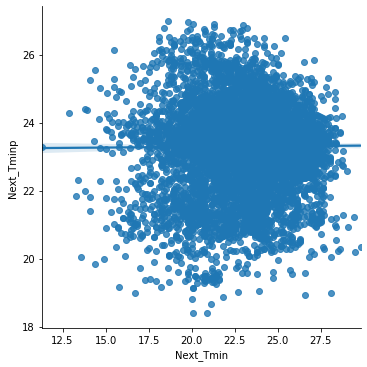

In [76]:
sn.lmplot(x='Next_Tmin',y='Next_Tminp',data=df,palette='rainbow')

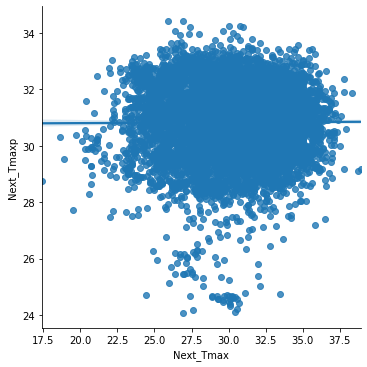

In [77]:
sn.lmplot(x='Next_Tmax',y='Next_Tmaxp',data=df,palette='rainbow')

In [78]:
import joblib
joblib.dump(model,'Temperature.pkl')

['Temperature.pkl']